# Tarea 2
## Alumno: Eduardo Antonio Peña Sandoval C.U. 143508

In [1]:
# Cargamos las librerías
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Cargar los datos
df = pd.read_csv('./train.csv')

In [3]:
# Exploración de los datos
print("Primeras filas del dataset:")
df.head()

Primeras filas del dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Exploración de los datos
print("\nInformación general:")
df.info()


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null  

In [5]:
# Exploración de los datos
print("\nEstadísticas descriptivas:")
df.describe()


Estadísticas descriptivas:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Identificación de variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
num_categorical = len(categorical_cols)
print("Número de variables categóricas: ", num_categorical)

Número de variables categóricas:  43


Hay una gran cantidad de variables independientes (80 para ser precisos, incluyendo "Id", de las cuales 43 son **categóricas**) y no resulta tan obvio por dónde empezar sin antes hacer algunas visualizaciones.

También observamos que muchas de ellas tienen valores faltantes.

# Exploratory Data Analysis (EDA)

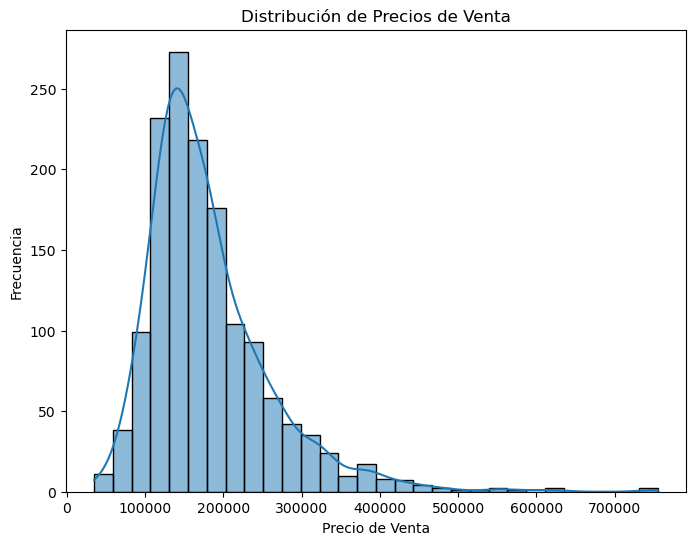

In [7]:
# Visualización de la distribución del precio
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribución de Precios de Venta')
plt.xlabel('Precio de Venta')
plt.ylabel('Frecuencia')
plt.show()

El gráfico se parece a una distribución normal. Para algunas aproximaciones podría resultar conveniente aplicar una transformación (por ejemplo, logaritmo) para que se parezca más a una distribución normal, pero en este análisis emplearemos un algoritmo de árboles de decisión, **XGBoost**, para lo que no resulta necesario.

## Correlación (variables numéricas)
Una buena manera de obtener una idea de la relación entre las variables es observar su correlación.

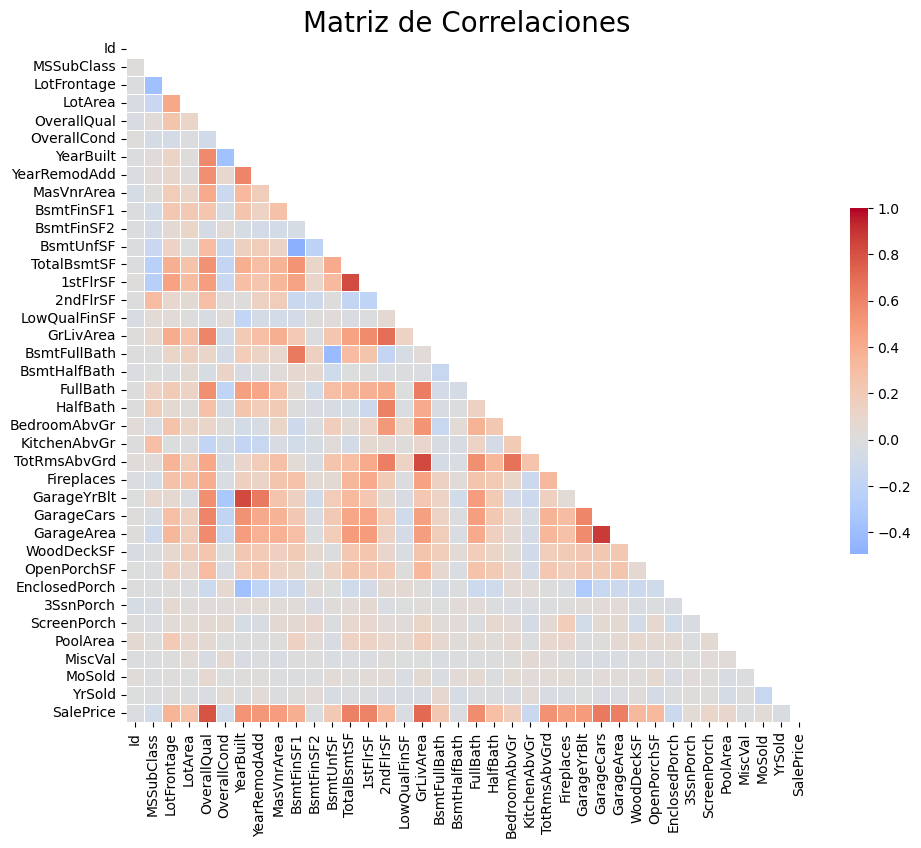

In [8]:
df_no_cat = df.drop(columns=categorical_cols) # Quitamos las variables categóricas
corr = df_no_cat.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Matriz de Correlaciones', fontsize=20)
plt.show()

Vemos un par de cuadros muy oscuros: uno es el de **GeneralQual vs SalePrice** (que parece ser una característica bastante importante). Otro es el de **GarageYrBlt vs YearBuilt**, lo que no sorprende dado lo que representan.

*Nota*:
- GarageYrBlt: Año en que se construyó el garaje.
- YearBuilt: Fecha de construcción de la casa.

Existen más casos similares a este último.

Posteriormente lo que haremos será extraer los 10 pares más correlacionados para evitar tener que emparejarlos en el gráfico.

In [9]:
# Calcular la correlación par a par de las columnas y apilarla para facilitar el filtrado y ordenado
corr = df_no_cat.corr().stack().reset_index()

# Asignar nombres a las columnas del DataFrame de correlación
corr.columns = ['Variable 1', 'Variable 2', 'Coeficiente de Correlación']

# Ordenar cada par de variables (esto permite que pares duplicados, como (A, B) y (B, A), sean tratados de la misma forma)
corr[['Variable 1', 'Variable 2']] = np.sort(corr[['Variable 1', 'Variable 2']], axis=1)

# Crear una columna adicional que indique si la correlación es positiva o negativa
corr['Sentido'] = corr['Coeficiente de Correlación'].apply(lambda x: 'Positiva' if x >= 0 else 'Negativa')

# Agregar una columna con el valor absoluto del coeficiente para comparar la magnitud de las correlaciones
corr['Coeficiente Absoluto'] = corr['Coeficiente de Correlación'].abs()

# Eliminar pares duplicados y autocorrelaciones (donde la variable se correlaciona consigo misma)
sorted_corr = corr[corr['Variable 1'] != corr['Variable 2']].drop_duplicates()

# Ordenar los pares por el valor absoluto del coeficiente de correlación, de mayor a menor
sorted_corr = sorted_corr.sort_values(by='Coeficiente Absoluto', ascending=False)

# Mostrar los 10 pares de variables con mayor correlación en valor absoluto
print("Top 10 Pares de Características con Mayor Correlación (valor absoluto):\n")
sorted_corr.head(10)

Top 10 Pares de Características con Mayor Correlación (valor absoluto):



,Variable 1,Variable 2,Coeficiente de Correlación,Sentido,Coeficiente Absoluto
1015,GarageArea,GarageCars,0.882475,Positiva,0.882475
253,GarageYrBlt,YearBuilt,0.825667,Positiva,0.825667
631,GrLivArea,TotRmsAbvGrd,0.825489,Positiva,0.825489
469,1stFlrSF,TotalBsmtSF,0.819530,Positiva,0.819530
189,OverallQual,SalePrice,0.790982,Positiva,0.790982
645,GrLivArea,SalePrice,0.708624,Positiva,0.708624
548,2ndFlrSF,GrLivArea,0.687501,Positiva,0.687501
821,BedroomAbvGr,TotRmsAbvGrd,0.676620,Positiva,0.676620
359,BsmtFinSF1,BsmtFullBath,0.649212,Positiva,0.649212
291,GarageYrBlt,YearRemodAdd,0.642277,Positiva,0.642277


Conclusiones sobre el análisis de correlaciones:

- GarageArea y GarageCars obviamente están muy relacionadas y solo conservaremos la variable **GarageCars**. Al final del día, lo que más nos interesa es la *cantidad total* de coches que caben en un garaje. Además, las variables categóricas suelen ser más fáciles de manejar, especialmente para los árboles de decisión.
- GarageYrBlt y YearBuilt probablemente sean las mismas, a menos que se haya añadido el garaje más tarde, lo que podría suceder, pero confiaremos en que esto no es tan frecuente. Solo conservaremos la variable **YearBuilt**.
- GrLivArea significa "superficie habitable en pies cuadrados (suelo)" y TotRmsAbvGrd es "Total de habitaciones sobre el nivel del suelo (no incluye los baños)". Nuevamente, están correlacionados de forma bastante natural, por lo que conservaremos la variable más sólida: **GrLivArea**.
- 1stFlrSF y TotalBsmtSF: no sorprende nuevamente que el área del primer piso no esté demasiado lejos del área del sótano.
- **OverallQual** y **GrLivArea** están fuertemente correlacionados con nuestra característica objetivo: el precio de venta.

Verifiquemos también las características más correlacionadas con SalePrice.

In [10]:
# Calcular la matriz de correlación de todas las variables
correlation = df_no_cat.corr()

# Extraer la correlación de cada variable con 'SalePrice'
# Se elimina la autocorrelación (SalePrice consigo mismo) y se reinicia el índice
corr_target = correlation['SalePrice'].drop('SalePrice').reset_index()
corr_target.columns = ['Variable', 'Coeficiente de Correlación']

# Agregar una columna con el valor absoluto del coeficiente de correlación
corr_target['Coeficiente Absoluto'] = corr_target['Coeficiente de Correlación'].abs()

# Agregar una columna que indique si la correlación es positiva o negativa
corr_target['Sentido'] = corr_target['Coeficiente de Correlación'].apply(lambda x: 'Positiva' if x >= 0 else 'Negativa')

# Ordenar las variables según el valor absoluto de la correlación de forma descendente y tomar las primeras 10
top_corr_features = corr_target.sort_values(by='Coeficiente Absoluto', ascending=False).head(10)

# Mostrar las 10 variables con mayor correlación en valor absoluto con 'SalePrice'
print("Top 10 Características con Mayor Correlación (valor absoluto) con 'SalePrice':\n")
top_corr_features


Top 10 Características con Mayor Correlación (valor absoluto) con 'SalePrice':



,Variable,Coeficiente de Correlación,Coeficiente Absoluto,Sentido
4,OverallQual,0.790982,0.790982,Positiva
16,GrLivArea,0.708624,0.708624,Positiva
26,GarageCars,0.640409,0.640409,Positiva
27,GarageArea,0.623431,0.623431,Positiva
12,TotalBsmtSF,0.613581,0.613581,Positiva
13,1stFlrSF,0.605852,0.605852,Positiva
19,FullBath,0.560664,0.560664,Positiva
23,TotRmsAbvGrd,0.533723,0.533723,Positiva
6,YearBuilt,0.522897,0.522897,Positiva
7,YearRemodAdd,0.507101,0.507101,Positiva


En conclusión, nos quedaremos con las variables **OverviewQual**, **GrLivArea**, **GarageCars** y **TotalBsmtSF**, todos con una correlación de 0,6+ con **SalePrice**.

## Variables categóricas

Una buena forma de ver la relación entr*e SalePri*ce y las variables categóricas es mediantgráficamas de ca y brazos, ya qeu nos permitirán identificarán valores atípicos que quizás queramos eliminar.

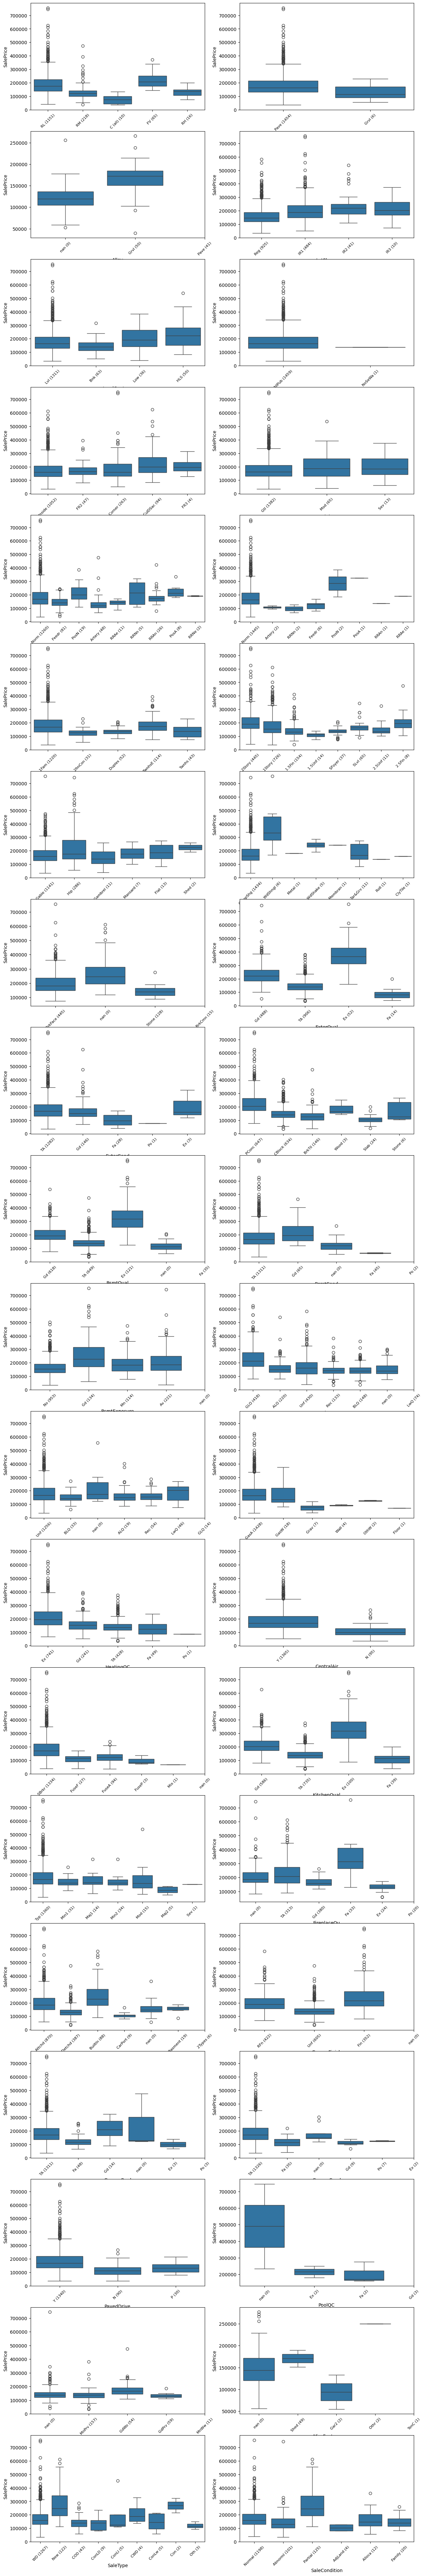

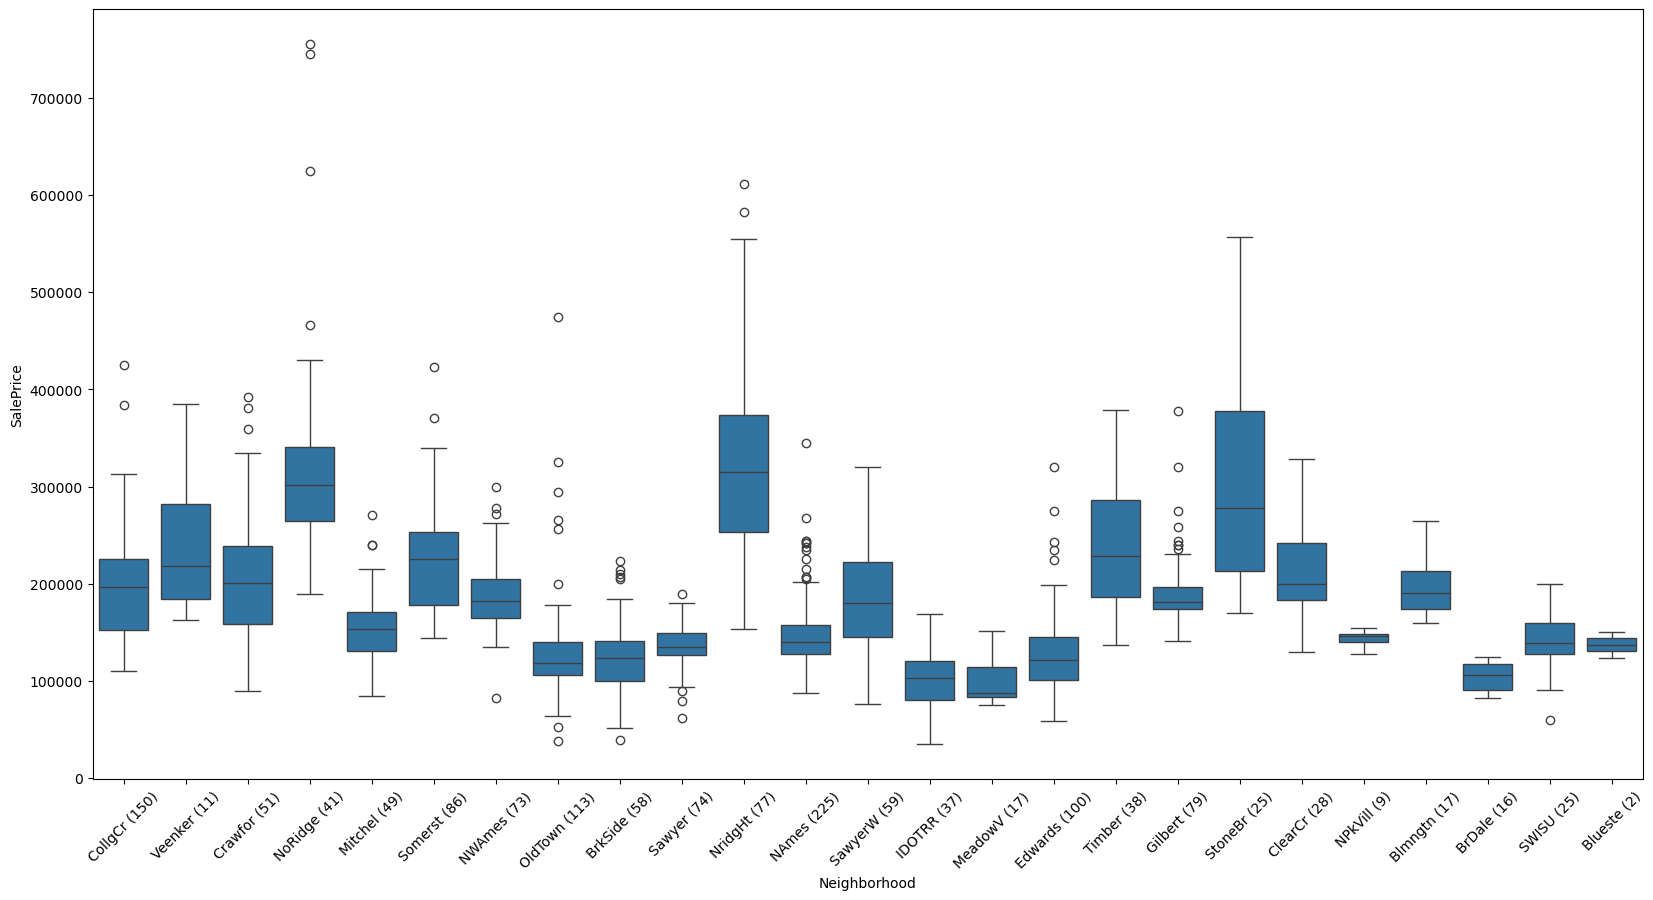

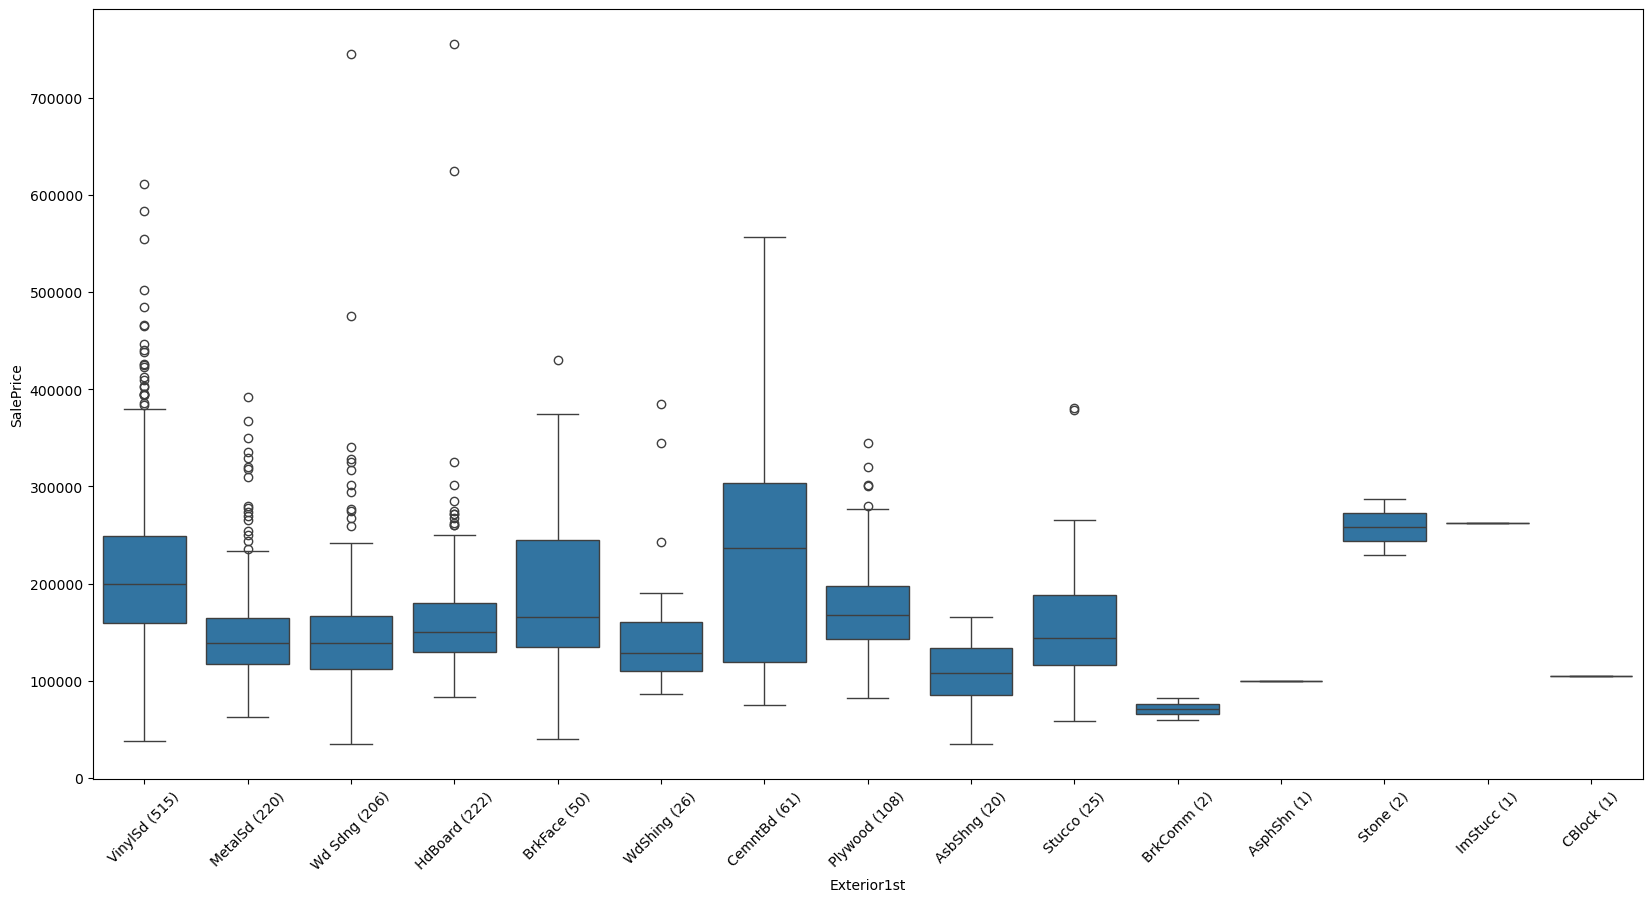

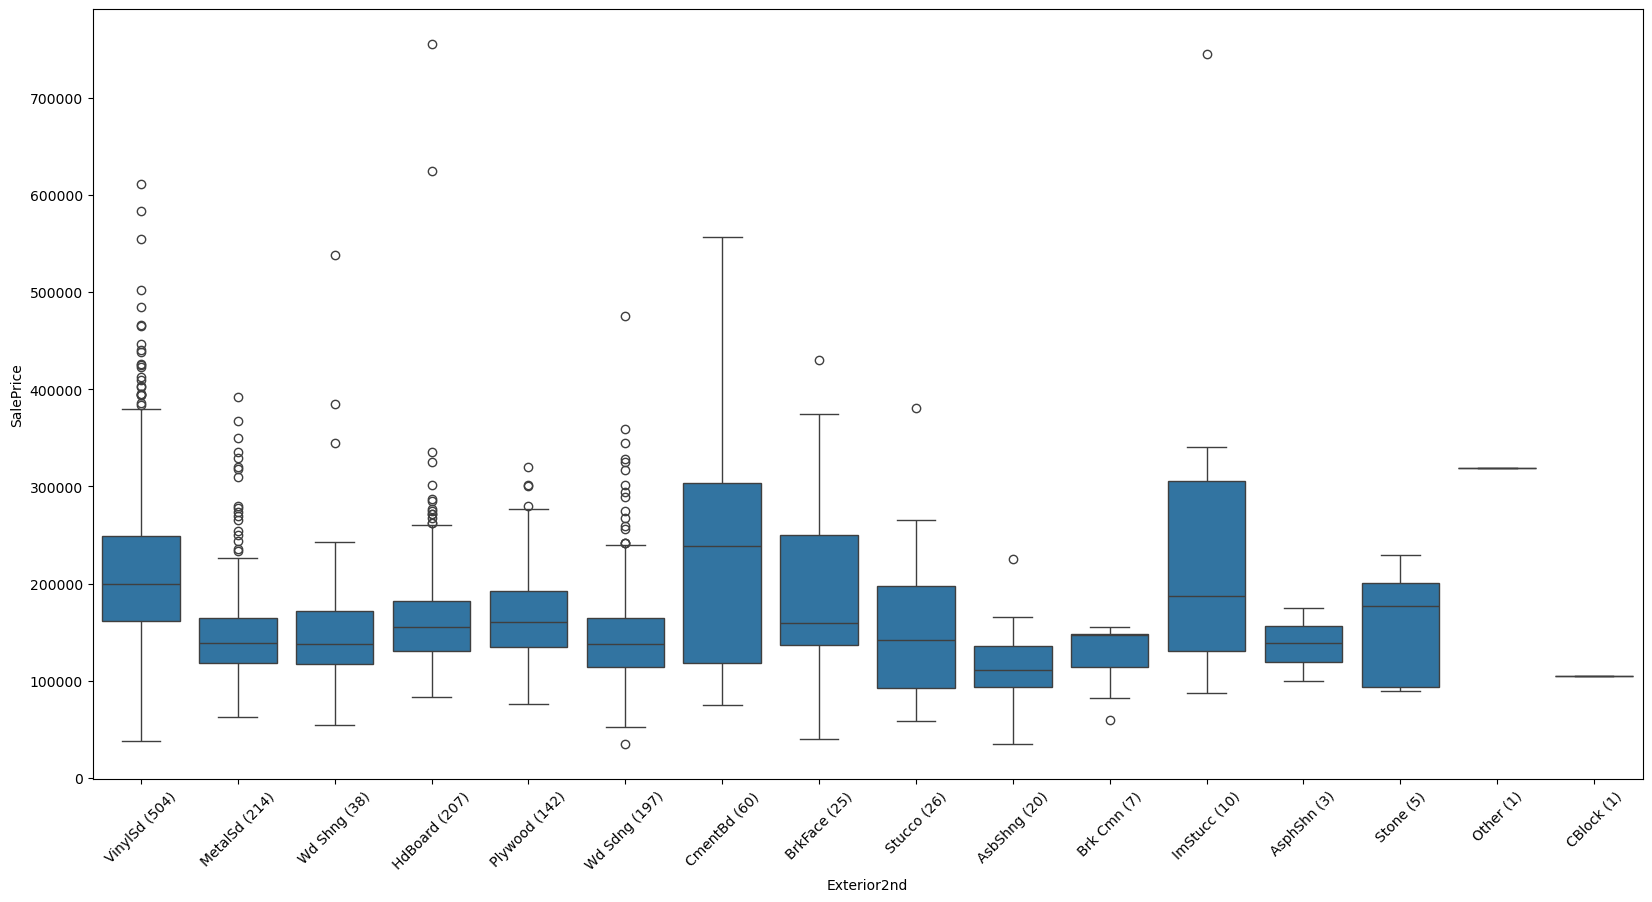

In [11]:
# Definir el número de filas y columnas para la cuadrícula de subplots
# Se restan 4 columnas porque se plotean aparte debido a que las etiquetas no caben
n_rows = math.ceil((len(categorical_cols) - 4) / 2)
n_cols = 2

# Crear la figura y la cuadrícula de subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))

# Lista de columnas para plotear en figuras separadas
large_plot_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd']

# Graficar en la cuadrícula de subplots
i = 0
for cat_col in categorical_cols:
    if cat_col not in large_plot_cols:
        row = i // n_cols
        col = i % n_cols
        # Graficar el boxplot
        sns.boxplot(x=df[cat_col], y=df['SalePrice'], ax=ax[row, col])
        
        # Obtener las categorías presentes en la columna
        categories = list(df[cat_col].unique())
        
        # Fijar manualmente los ticks: se usan índices de 0 a len(categories)-1
        ax[row, col].set_xticks(range(len(categories)))
        
        # Crear las etiquetas con el formato deseado
        labels = ['{} ({})'.format(cat, (df[cat_col] == cat).sum()) for cat in categories]
        
        # Establecer las etiquetas con la cantidad exacta de ticks
        ax[row, col].set_xticklabels(labels, fontsize=8, rotation=45)
        i += 1

# Graficar los plots más grandes por separado
for cat_col in large_plot_cols:
    plt.figure(figsize=(20, 10)) 
    sns.boxplot(x=df[cat_col], y=df['SalePrice'])
    
    # Obtener las categorías presentes en la columna
    categories = list(df[cat_col].unique())
    
    # Fijar manualmente los ticks
    plt.gca().set_xticks(range(len(categories)))
    
    # Crear las etiquetas correspondientes
    labels = ['{} ({})'.format(cat, (df[cat_col] == cat).sum()) for cat in categories]
    
    # Establecer las etiquetas con el número correcto de ticks
    plt.gca().set_xticklabels(labels, rotation=45)
    plt.show()


Conclusiones sobre el análisis visual de las gráficas de caja y brazos:
- *Alley* es una variable que no es nula solo en 91 casos
- *Street* tiene dos clases con solo 6 observaciones asociadas a la clase *Grvl*
- *Utilities* tiene solo dos clases: *AllPb* y *NoSea*, la última tiene solo una ocurrencia
- *Condition2* tiene 8 clases. Sin embargo, 1445 de 1460 observaciones pertenecen solo a una clase (*Norm*)
- *RoofMatl* tiene 8 clases. Sin embargo, 1434 de 1460 observaciones pertenecen solo a una clase (*CompShg*)
- *Heating* tiene 6 clases. Sin embargo, 1428 de 1460 observaciones pertenecen solo a una clase (*GasA*)
- *MiscFeature* es similar a *Alley*, con solo 54 valores no nulos

# Preprocesamiento de los Datos

Como se revisó en la sección Correlaciones, comenzamos eliminando características significativas con multicolinealidad, así como la columna *Id* que no proporciona ninguna información.

In [12]:
df.drop(['GarageArea', 'GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'Id'], axis=1, inplace = True)

A continuación eliminamso las variables que tenían muy pocos datos en más de una clase

In [13]:
df.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating'], axis=1, inplace = True)

## Valores nulos

In [14]:
# Identificación de valores nulos en cada columna
missing_values = df.isnull().sum()

# Filtrar solo las columnas que tienen al menos un valor faltante
missing_values = missing_values[missing_values > 0]

# Calcular el porcentaje de valores faltantes por columna
porcentaje = (missing_values / len(df)) * 100

# Crear un DataFrame que combine ambos resultados
missing_data = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje (%)': porcentaje
})

# Ordenar el DataFrame del mayor al menor porcentaje
missing_data = missing_data.sort_values('Porcentaje (%)', ascending=False)

# Mostrar los resultados
print("\nValores nulos por columna ordenados por porcentaje descendente:")
missing_data



Valores nulos por columna ordenados por porcentaje descendente:


,Valores Faltantes,Porcentaje (%)
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


**Nota**: De la descripción de los datos se desprende que muchos de los valores faltantes en realidad representan una clase de la característica, en particular NA (no aplicable/disponible), en lugar de que los datos realmente falten.

En primer lugar, descartamos **PoolQC** ya que más del 99.5 % de los datos son nulos y no mostró ningún patrón obvio cuando analizamos los diagramas de caja anteriormente. Mientras que las siguientes variables que faltan con más frecuencia son **MiscFeature** y **Alley**.

In [15]:
df.drop(['PoolQC','Alley', 'MiscFeature'], axis=1, inplace = True)

La variable *Fence* cuenta con valores nulos en aproximadamente el 80 % de los datos, lo que significa que no hay cerca y no que los datos simplemente no están allí. Caso similar para la variable *FireplaceQu*.

In [16]:
# Reemplazamos 'NaN' en las variables 'Fence' y 'FireplaceQu' con 'None'
df['Fence'] = df['Fence'].fillna('None')
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

Para la variable *LotFrontage* reemplazaremos los valores faltantes por la mediana.

In [17]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

#### Variables asociadas a *Garage*
Mantendremos *GarageQual* porque esto es lo que generalmente le importa a la mayoría de las personas. Reemplazaremos los valores faltantes por "None" para crear una clase que indique que no hay garaje.

#### Variables asociadas a *Basement* y *Masonry*
Mismo principio.


In [18]:
df.drop(['GarageType', 'GarageFinish', 'GarageCond'], axis=1, inplace=True)
df['GarageQual'] = df['GarageQual'].fillna('None')

df.drop(['BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtFinType1'], axis=1, inplace=True)
df['BsmtQual'] = df['BsmtQual'].fillna('None')

df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

Ya hemos procesado la gran mayoría de los valores faltantes y los que quedan tienen menos de 5 observaciones. Completaremos esos valores faltantes con el valor más común.

In [19]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [20]:
# Mapeo de variables categóricas
quality_mapping = {
    'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0, 'None': -1
}

# Aplicar el mapeo a las variables categóricas
df['ExterQual'] = df['ExterQual'].map(quality_mapping)
df['BsmtQual'] = df['BsmtQual'].map(quality_mapping)
df['KitchenQual'] = df['KitchenQual'].map(quality_mapping)

# Preparamos los datos para el entrenamiento

In [21]:
# Identificación de variables categóricas
categorical_features = df.select_dtypes(include=['object']).columns.to_list()

# Codificación de variables categóricas
for col in categorical_features:
    le = LabelEncoder()
    df[col] = df[col].astype(str)
    df[col] = le.fit_transform(df[col])

In [22]:
# Reducción de dimensionalidad con selección de características
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
selector = SelectKBest(score_func=f_regression, k=10)  # Seleccionamos las 10 mejores características
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nCaracterísticas seleccionadas:")
selected_features


Características seleccionadas:


Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual',
       'TotalBsmtSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars'],
      dtype='object')

In [23]:
df[selected_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   OverallQual   1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   YearRemodAdd  1460 non-null   int64
 3   ExterQual     1460 non-null   int64
 4   BsmtQual      1460 non-null   int64
 5   TotalBsmtSF   1460 non-null   int64
 6   GrLivArea     1460 non-null   int64
 7   FullBath      1460 non-null   int64
 8   KitchenQual   1460 non-null   int64
 9   GarageCars    1460 non-null   int64
dtypes: int64(10)
memory usage: 114.2 KB


In [24]:
# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [25]:
# Entrenamiento del modelo
xgboost_model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, objective='reg:squarederror')
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
# Evaluación de modelos
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f'\nEvaluación del modelo {model_name}:')
    print(f'MAE: {mae:.2f}')
    print(f'RMSE: {rmse:.2f}')

evaluate_model(xgboost_model, X_test, y_test, 'XGBoost')


Evaluación del modelo XGBoost:
MAE: 19406.10
RMSE: 29073.47


Dado que el valor promedio de las casas en el dataset es **180,921.20**, podemos analizar los errores en relación con este valor:

#### MAE (Mean Absolute Error) = 19,406.10
- Representa un error promedio de 10.73% en relación con el valor medio de las casas.

#### RMSE (Root Mean Squared Error) = 29,073.47
- Representa la dispersión típica del error y penaliza más los errores grandes.
- En términos relativos, el RMSE equivale a 16.07% del precio promedio de las casas.

Si en el contexto del negocio un error del 10% al 16% es aceptable, entonces los resultados pueden considerarse razonables.

In [27]:
# Entrenamiento del modelo
X = df[selected_features]
y = df['SalePrice']
xgboost_model = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, objective='reg:squarederror')
xgboost_model.fit(X, y)

# Entrada manual en consola
def manual_input_prediction():
    print("Ingrese los datos relativos a la Casa/Inmueble")
    user_input = {}
    
    user_input['OverallQual'] = int(input("Ingrese Calidad General (1-10): "))
    user_input['YearBuilt'] = int(input("Ingrese Año de construcción (1850-2024): "))
    user_input['YearRemodAdd'] = int(input("Ingrese Año de Remodelación (1850-2024): "))
    user_input['ExterQual'] = int(input("Ingrese Calidad del material exterior (0-4): "))
    user_input['BsmtQual'] = int(input("Ingrese Calidad del sótano (0-4): "))
    user_input['TotalBsmtSF'] = int(input("Ingrese Total de ft2 del área del sótano (0-7000): "))
    user_input['GrLivArea'] = int(input("Ingrese Superficie habitable sobre el nivel del suelo (ft2) (100-7000): "))
    user_input['FullBath'] = int(input("Ingrese Baños Completos (0-10): "))
    user_input['KitchenQual'] = int(input("Ingrese Calidad de la cocina (0-4): "))
    user_input['GarageCars'] = int(input("Ingrese N° de autos que caben en el garage (0-10): "))
    
    input_data = pd.DataFrame([user_input])
    predicted_price = xgboost_model.predict(input_data)
    print(f'\nPrecio estimado de la casa: ${predicted_price[0]:,.2f}')

In [28]:
manual_input_prediction()

Ingrese los datos relativos a la Casa/Inmueble


Ingrese Calidad General (1-10):  7
Ingrese Año de construcción (1850-2024):  2001
Ingrese Año de Remodelación (1850-2024):  2002
Ingrese Calidad del material exterior (0-4):  3
Ingrese Calidad del sótano (0-4):  3
Ingrese Total de ft2 del área del sótano (0-7000):  1145
Ingrese Superficie habitable sobre el nivel del suelo (ft2) (100-7000):  2198
Ingrese Baños Completos (0-10):  2
Ingrese Calidad de la cocina (0-4):  3
Ingrese N° de autos que caben en el garage (0-10):  2



Precio estimado de la casa: $247,230.66


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Cargar y mostrar la imagen
img = mpimg.imread("./diagrama.png")
plt.figure(figsize=(32, 24))  # Cambia los valores según sea necesario
plt.imshow(img)
plt.axis('off')  # Oculta los ejes
plt.show()